In [1]:
#import modules/packages
import os, sys
sys.path.append('../')
import general as gen
import plotstyle as ps
import stats
from matplotlib import pyplot as plt
from astropy.table import Table
import numpy as np
import glob
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple
from matplotlib.patches import Rectangle
from scipy.special import erf

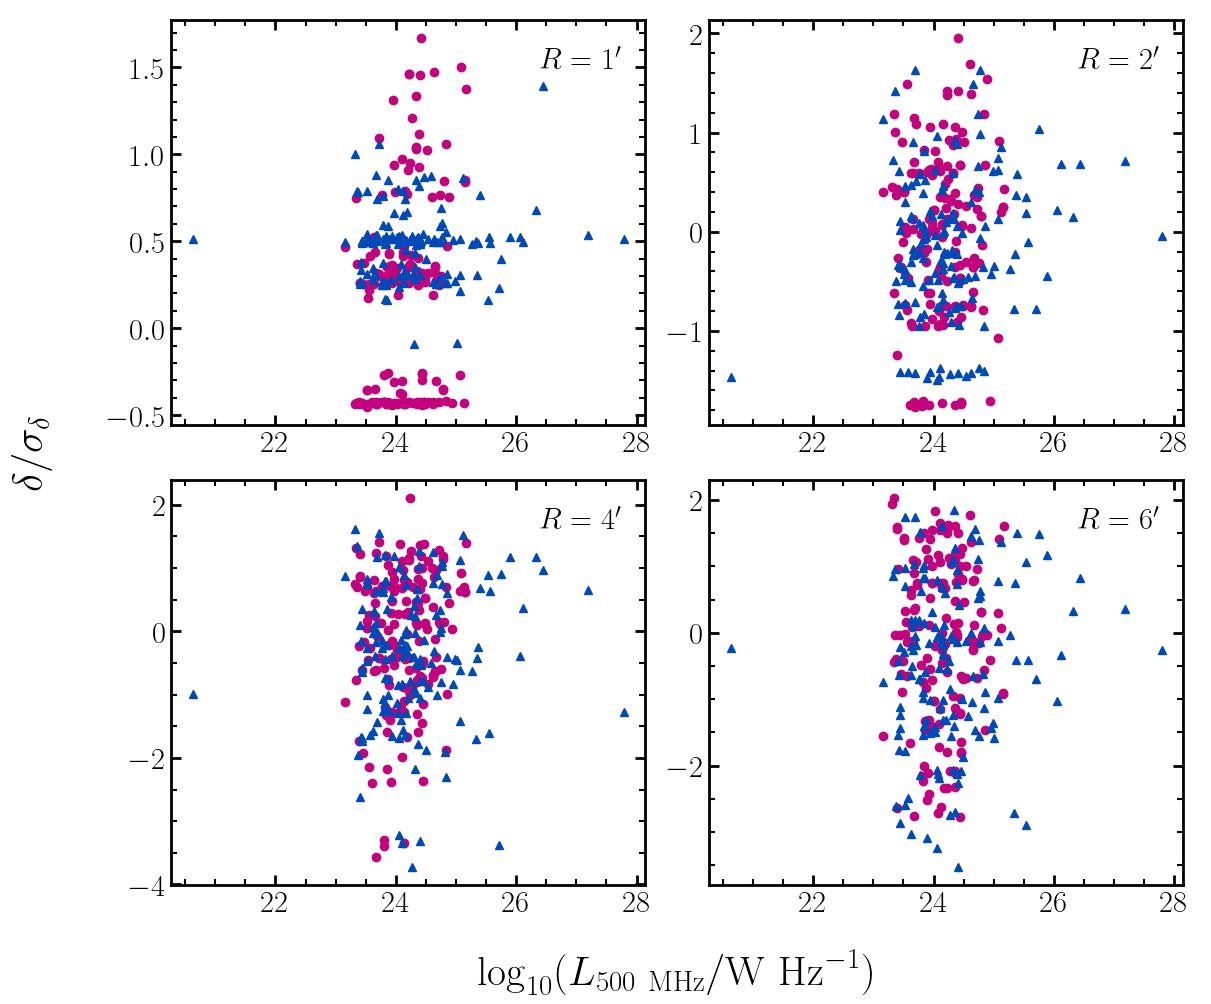

In [18]:
#relevant paths
PATH_CATS = gen.PATH_CATS
PATH_PLOTS = gen.PATH_PLOTS
PATH_SIMS = gen.PATH_SIMS
PATH_PARAMS = PATH_CATS + 'Schechter_params/'
PATH_COUNTS = PATH_CATS + 'Number_counts/'
#directory containing the simulated number counts (relevant only if plot_sims = True)
PATH_SIM_NC = PATH_CATS + 'Significance_tests/'
main_only = True


#catalogue containing delta values for each RQ and HLAGN/MLAGN analogue
data_rq = Table.read(PATH_CATS + 'RAGERS_COSMOS2020_matches_Mstar_z_rq_with_deltas.fits')
data_rl = Table.read(PATH_CATS + 'RAGERS_COSMOS2020_matches_Mstar_z_rl_with_deltas.fits')

#exclude any galaxies without Lradio_60cm values
data_rq = data_rq[~data_rq['Lradio_60cm'].mask]
#retrieve the radio luminosities (500 MHz) of the two samples
L_rq = data_rq['Lradio_60cm']#.filled(-99)
L_rl = data_rl['Lradio_60cm']
#sort the tables by radio luminosity
data_rq.sort('Lradio_60cm')
data_rl.sort('Lradio_60cm')
#calculate the minimum and maximum radio luminosity in across the RQ and HLAGN/MLAGN samples
L_all = np.concatenate([L_rq, L_rl])
#Lmin, Lmax = np.nanmin(L_all), np.nanmax(L_all)
Lmin, Lmax = 23., 27.


plt.style.use(ps.styledict)


f = plt.figure(figsize=(14.,12.))
gs = f.add_gridspec(ncols=3, nrows=3, width_ratios=[1, 50, 50], height_ratios=[100, 100, 1])
#add 4 sets of axes for the data
ax1 = f.add_subplot(gs[0,1])
ax2 = f.add_subplot(gs[0,2])
ax3 = f.add_subplot(gs[1,1])
ax4 = f.add_subplot(gs[1,2])
#add subplots without frames to label the x and y axes
ax_xlabel = f.add_subplot(gs[2,1:3], frameon=False)
ax_xlabel.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
ax_xlabel.set_xlabel(r'$\log_{10}(L_{500~{\rm MHz}} / {\rm W~Hz}^{-1})$', fontsize=30., labelpad=-20)
ax_ylabel = f.add_subplot(gs[0:2,0], frameon=False)
ax_ylabel.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
ax_ylabel.set_ylabel(r'$\delta / \sigma_{\delta}$', fontsize=30.)

#cycle through the radii used
for ax,r in zip([ax1, ax2, ax3, ax4],[1, 2, 4, 6]):
	#determine which axis to plot on
	#nrow = idx // 2
	#ncol = idx % 2

	#get the delta values and lower uncertainties for the current radius
	delta_rq = data_rq[f'delta_{r}']
	edelta_lo_rq = data_rq[f'edelta_lo_{r}']
	edelta_hi_rq = data_rq[f'edelta_hi_{r}']
	delta_rl = data_rl[f'delta_{r}']
	edelta_lo_rl = data_rl[f'edelta_lo_{r}']
	edelta_hi_rl = data_rl[f'edelta_hi_{r}']
	#mask for identifying underdensities
	ud_mask_rq = delta_rq < 0.
	ud_mask_rl = delta_rl < 0.
	
	X_rq = L_rq
	X_rl = L_rl
	#calculate the ratio of delta to the relevant uncertainty
	Y_rq = delta_rq / edelta_lo_rq
	Y_rl = delta_rl / edelta_lo_rl
	Y_rq[ud_mask_rq] = delta_rq[ud_mask_rq] / edelta_hi_rq[ud_mask_rq]
	Y_rl[ud_mask_rl] = delta_rl[ud_mask_rl] / edelta_hi_rl[ud_mask_rl]

	ax.plot(X_rq, Y_rq, linestyle='none', marker='o', label='RQ', color=ps.magenta)
	ax.plot(X_rl, Y_rl, linestyle='none', marker='^', label='HLAGN/MLAGN', color=ps.dark_blue)

	ax.text(0.95, 0.9, r'$R = %i^{\prime}$'%r, va='center', ha='right', transform=ax.transAxes)

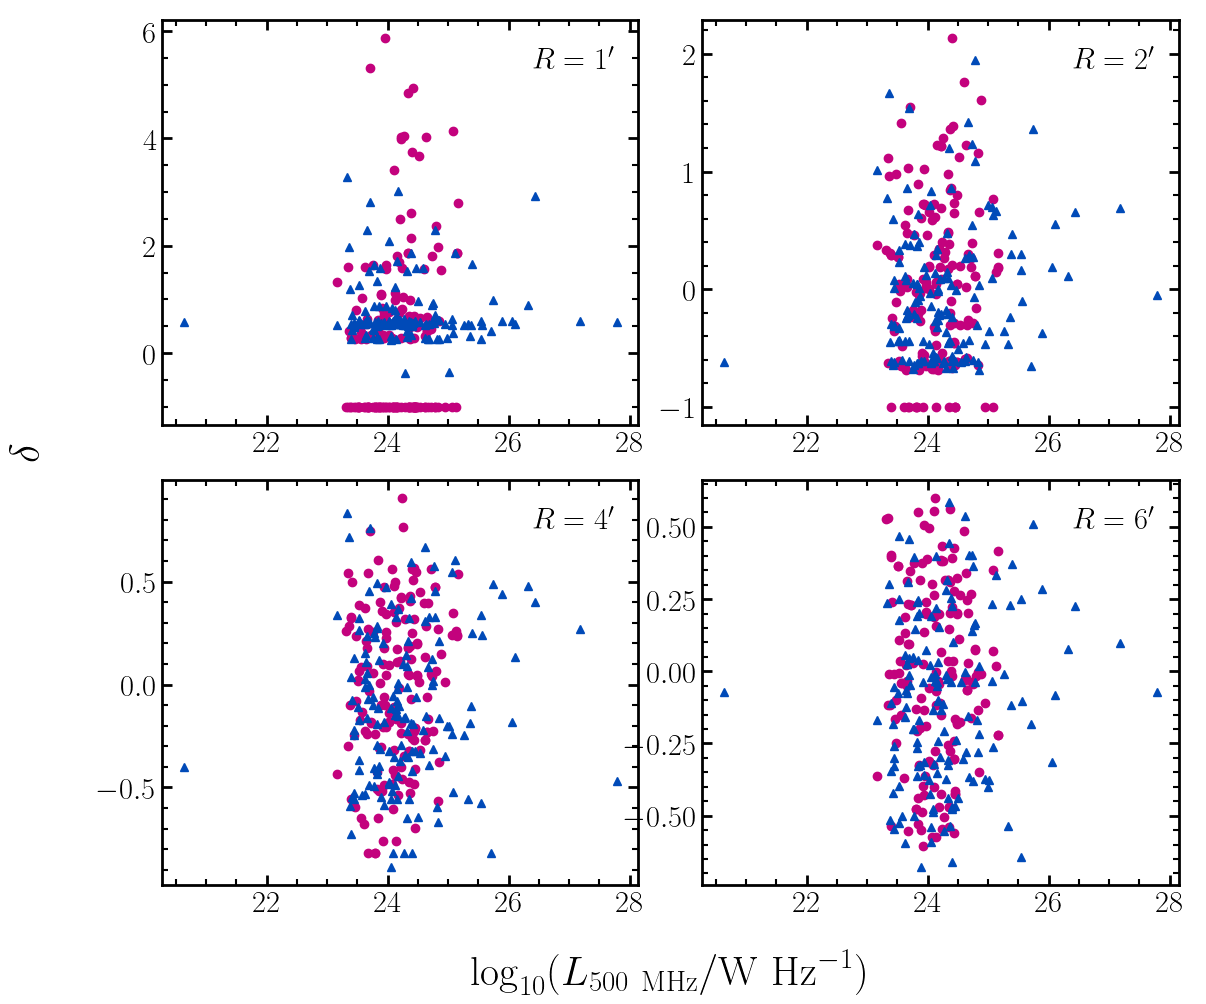

In [20]:
f = plt.figure(figsize=(14.,12.))
gs = f.add_gridspec(ncols=3, nrows=3, width_ratios=[1, 100, 100], height_ratios=[100, 100, 1])
#add 4 sets of axes for the data
ax1 = f.add_subplot(gs[0,1])
ax2 = f.add_subplot(gs[0,2])
ax3 = f.add_subplot(gs[1,1])
ax4 = f.add_subplot(gs[1,2])
#add subplots without frames to label the x and y axes
ax_xlabel = f.add_subplot(gs[2,1:3], frameon=False)
ax_xlabel.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
ax_xlabel.set_xlabel(r'$\log_{10}(L_{500~{\rm MHz}} / {\rm W~Hz}^{-1})$', fontsize=30., labelpad=-20)
ax_ylabel = f.add_subplot(gs[0:2,0], frameon=False)
ax_ylabel.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
ax_ylabel.set_ylabel(r'$\delta$', fontsize=30.)

#cycle through the radii used
for ax,r in zip([ax1, ax2, ax3, ax4],[1, 2, 4, 6]):
	#determine which axis to plot on
	#nrow = idx // 2
	#ncol = idx % 2

	#get the delta values and lower uncertainties for the current radius
	delta_rq = data_rq[f'delta_{r}']
	delta_rl = data_rl[f'delta_{r}']
	
	X_rq = L_rq
	X_rl = L_rl
	#calculate the ratio of delta to the relevant uncertainty
	Y_rq = delta_rq
	Y_rl = delta_rl

	ax.plot(X_rq, Y_rq, linestyle='none', marker='o', label='RQ', color=ps.magenta)
	ax.plot(X_rl, Y_rl, linestyle='none', marker='^', label='HLAGN/MLAGN', color=ps.dark_blue)

	ax.text(0.95, 0.9, r'$R = %i^{\prime}$'%r, va='center', ha='right', transform=ax.transAxes)